In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [45]:
# Reading datasets
df_2016 = pd.read_csv('NBA-season-2016-2017.csv')
df_2017 = pd.read_csv('NBA-season-2017-2018.csv')
df_2018 = pd.read_csv('NBA-season-2018-2019.csv')
df_players = pd.read_csv('NBA-playerlist.csv')

# Supplementary data set for classification testing
df_2015 = pd.read_csv('NBA-season-2015-2016.csv')

In [3]:
# Rows with value '18' in EVENTMSGTYPE column does not provide any information
df_2018.loc[df_2018['EVENTMSGTYPE'] == 18]

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
42,42,0,18,63,21800794,NaN,NaN,7:05,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,12 - 6,-6,NaN,9:18 PM
203,203,1,18,313,21800794,NaN,NaN,0:54,2,0.0,...,0,NaN,NaN,NaN,NaN,NaN,61 - 55,-6,NaN,10:00 PM
335,335,0,18,486,21800794,NaN,NaN,0:00,3,0.0,...,0,NaN,NaN,NaN,NaN,NaN,94 - 80,-14,NaN,10:47 PM
556,107,0,18,159,21800982,NaN,NaN,0:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,23 - 29,6,NaN,8:36 PM
827,378,0,18,559,21800982,NaN,NaN,7:30,4,0.0,...,0,NaN,NaN,NaN,NaN,NaN,87 - 93,6,NaN,9:55 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579799,572,1,18,801,21800987,NaN,NaN,0:52,4,0.0,...,0,NaN,NaN,NaN,NaN,NaN,113 - 112,-1,NaN,9:36 PM
579805,578,0,18,806,21800987,NaN,NaN,0:22,4,0.0,...,0,NaN,NaN,NaN,NaN,NaN,113 - 112,-1,NaN,9:39 PM
580402,106,0,18,144,21800297,NaN,NaN,0:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,27 - 27,TIE,NaN,8:34 PM
581063,348,1,18,511,21801083,NaN,NaN,9:03,4,0.0,...,0,NaN,NaN,NaN,NaN,NaN,90 - 90,TIE,NaN,9:24 PM


In [46]:
# Remove rows with value '18' in EVENTMSGTYPE column from all datasets
df_2015 = df_2015[df_2015.EVENTMSGTYPE != 18]
df_2016 = df_2016[df_2016.EVENTMSGTYPE != 18]
df_2017 = df_2017[df_2017.EVENTMSGTYPE != 18]
df_2018 = df_2018[df_2018.EVENTMSGTYPE != 18]

In [47]:
# Sort games from oldest to latest in dataset
sorted_df_2015 = df_2015.sort_values(["GAME_ID", "EVENTNUM"]).reset_index(drop=True)
sorted_df_2016 = df_2016.sort_values(["GAME_ID", "EVENTNUM"]).reset_index(drop=True)
sorted_df_2017 = df_2017.sort_values(["GAME_ID", "EVENTNUM"]).reset_index(drop=True)
sorted_df_2018 = df_2018.sort_values(["GAME_ID", "EVENTNUM"]).reset_index(drop=True)

In [272]:
# Total amount of fouls called in a season
df_2018['EVENTMSGTYPE'].value_counts()[6]

52915

SAS committed the least amount of fouls
PHX committed the most amount of fouls
The mean number for fouls committed is 3534.5666666666666


Text(0, 0.5, 'Fouls Committed')

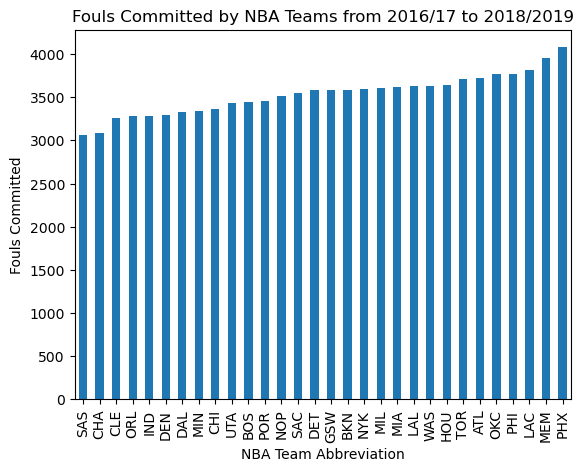

In [6]:
# Fouls called against each team
teamFouls_16 = df_2016.groupby('PLAYER1_TEAM_ABBREVIATION')['EVENTMSGTYPE'].apply(lambda x: x[x == 6].count())
teamFouls_17 = df_2017.groupby('PLAYER1_TEAM_ABBREVIATION')['EVENTMSGTYPE'].apply(lambda x: x[x == 6].count())
teamFouls_18 = df_2018.groupby('PLAYER1_TEAM_ABBREVIATION')['EVENTMSGTYPE'].apply(lambda x: x[x == 6].count())

aggregate_teamFouls = pd.concat([teamFouls_16, teamFouls_17, teamFouls_18], axis=1)
teamFouls = aggregate_teamFouls.sum(axis=1)

min_teamFouls = teamFouls.idxmin()
max_teamFouls = teamFouls.idxmax()
mean_teamFouls = teamFouls.mean()
print(f"{min_teamFouls} committed the least amount of fouls")
print(f"{max_teamFouls} committed the most amount of fouls")
print(f"The mean number for fouls committed is {mean_teamFouls}")

sorted_teamFouls = teamFouls.sort_values()
sorted_teamFouls.plot(kind='bar')
plt.title("Fouls Committed by NBA Teams from 2016/17 to 2018/2019")
plt.xlabel("NBA Team Abbreviation")
plt.ylabel("Fouls Committed")

In [68]:
teamFouls_16.index.to_list

<bound method IndexOpsMixin.tolist of Index(['ATL', 'BKN', 'BOS', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW',
       'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK',
       'OKC', 'ORL', 'PHI', 'PHX', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS'],
      dtype='object', name='PLAYER1_TEAM_ABBREVIATION')>

In [71]:
fouls_wins_17 = pd.concat([teamFouls_17, win_counts_17], axis=1)

In [74]:
fouls_wins_17.corr()

,EVENTMSGTYPE,WINNER_TEAM
EVENTMSGTYPE,1.000000,-0.180794
WINNER_TEAM,-0.180794,1.000000


<AxesSubplot:xlabel='EVENTMSGTYPE', ylabel='WINNER_TEAM'>

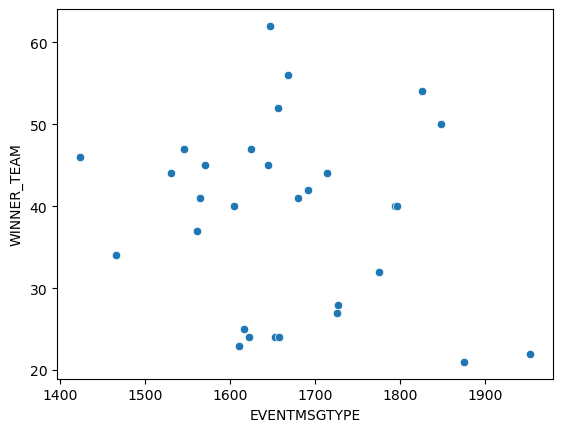

In [73]:
sns.scatterplot(x=fouls_wins_17.EVENTMSGTYPE, y=fouls_wins_17.WINNER_TEAM)

CHI is the least fouled team
LAC is the most fouled team
The mean number for fouls called for a team is 3451.1


Text(0, 0.5, 'Fouls Committed Against')

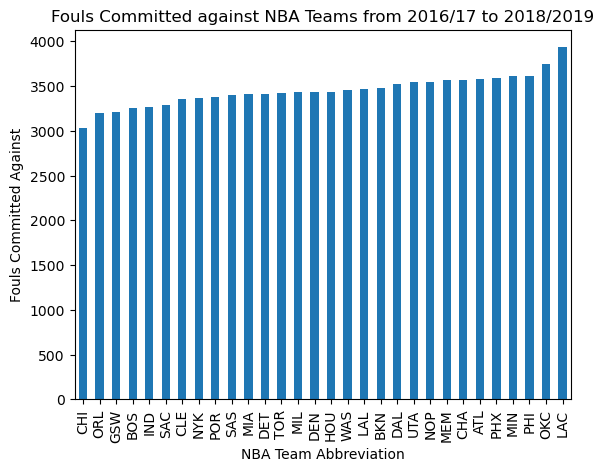

In [7]:
# Fouls called for each team
teamFouleds_16 = df_2016.groupby('PLAYER2_TEAM_ABBREVIATION')['EVENTMSGTYPE'].apply(lambda x: x[x == 6].count())
teamFouleds_17 = df_2017.groupby('PLAYER2_TEAM_ABBREVIATION')['EVENTMSGTYPE'].apply(lambda x: x[x == 6].count())
teamFouleds_18 = df_2018.groupby('PLAYER2_TEAM_ABBREVIATION')['EVENTMSGTYPE'].apply(lambda x: x[x == 6].count())

aggregate_teamFouleds = pd.concat([teamFouleds_16, teamFouleds_17, teamFouleds_18], axis=1)
teamFouleds = aggregate_teamFouleds.sum(axis=1)

min_teamFouleds = teamFouleds.idxmin()
max_teamFouleds = teamFouleds.idxmax()
mean_teamFouleds = teamFouleds.mean()
print(f"{min_teamFouleds} is the least fouled team")
print(f"{max_teamFouleds} is the most fouled team")
print(f"The mean number for fouls called for a team is {mean_teamFouleds}")

sorted_teamFouleds = teamFouleds.sort_values()
sorted_teamFouleds.plot(kind='bar')
plt.title("Fouls Committed against NBA Teams from 2016/17 to 2018/2019")
plt.xlabel("NBA Team Abbreviation")
plt.ylabel("Fouls Committed Against")

In [19]:
# Remove rows with value '0' in PLAYER1_ID column
players_2016 = df_2016[df_2016.PLAYER1_ID != 0]
players_2017 = df_2017[df_2017.PLAYER1_ID != 0]
players_2018 = df_2018[df_2018.PLAYER1_ID != 0]

In [20]:
# Fouls committed by each player
playerFouls_16 = players_2016.groupby('PLAYER1_ID')['EVENTMSGTYPE'].apply(lambda x: (x == 6).sum())
playerFouls_17 = players_2017.groupby('PLAYER1_ID')['EVENTMSGTYPE'].apply(lambda x: (x == 6).sum())
playerFouls_18 = players_2018.groupby('PLAYER1_ID')['EVENTMSGTYPE'].apply(lambda x: (x == 6).sum())

aggregate_playerFouls = pd.concat([playerFouls_16, playerFouls_17, playerFouls_18], axis=1)
playerFouls = aggregate_playerFouls.sum(axis=1)

# Remove row with 0 as PLAYER1_ID as it is an invalid value
playerFouls = playerFouls[playerFouls.index != 0].to_frame()
playerFouls.columns = ['FOULS']

In [21]:
# Fouls commited against each player
playerFouleds_16 = players_2016.groupby('PLAYER2_ID')['EVENTMSGTYPE'].apply(lambda x: (x == 6).sum())
playerFouleds_17 = players_2017.groupby('PLAYER2_ID')['EVENTMSGTYPE'].apply(lambda x: (x == 6).sum())
playerFouleds_18 = players_2018.groupby('PLAYER2_ID')['EVENTMSGTYPE'].apply(lambda x: (x == 6).sum())

aggregate_playerFouleds = pd.concat([playerFouleds_16, playerFouleds_17, playerFouleds_18], axis=1)
playerFouleds = aggregate_playerFouleds.sum(axis=1)

# Remove row with 0 as PLAYER1_ID as it is an invalid value
playerFouleds = playerFouleds[playerFouleds.index != 0].to_frame()
playerFouleds.columns = ['FOULEDS']

In [22]:
playerFouleds

,FOULEDS
PLAYER2_ID,
1713.0,149.0
1718.0,4.0
1891.0,13.0
1897.0,1.0
1938.0,155.0
...,...
1629234.0,10.0
1629244.0,8.0
1629312.0,1.0


In [11]:
# Calculate how many games is the player involved in
def getGamesInvolved(player):    
    player_id = player.name
    
    gamesInvolved_2016 = df_2016.groupby('GAME_ID').apply(lambda x: (x['PLAYER1_ID'] == player_id).sum() +( x['PLAYER2_ID'] == player_id).sum() + (x['PLAYER3_ID'] == player_id).sum())
    gamesInvolved_2017 = df_2017.groupby('GAME_ID').apply(lambda x: (x['PLAYER1_ID'] == player_id).sum() +( x['PLAYER2_ID'] == player_id).sum() + (x['PLAYER3_ID'] == player_id).sum())
    gamesInvolved_2018 = df_2018.groupby('GAME_ID').apply(lambda x: (x['PLAYER1_ID'] == player_id).sum() +( x['PLAYER2_ID'] == player_id).sum() + (x['PLAYER3_ID'] == player_id).sum())
    
    return len(gamesInvolved_2016[gamesInvolved_2016 > 0]) + len(gamesInvolved_2017[gamesInvolved_2017 > 0]) + len(gamesInvolved_2018[gamesInvolved_2018 > 0]) 

In [12]:
# Get Fouls per Game for each NBA player
playerFouls['GAMES_INVOLVED'] = playerFouls.apply(lambda x: getGamesInvolved(x), axis=1)
playerFouls['FOULS_PER_GAME'] = playerFouls.apply(lambda x: x.FOULS/x.GAMES_INVOLVED if x.GAMES_INVOLVED != 0 else 0, axis=1)

KeyboardInterrupt: 

In [188]:
# Get Fouleds per Game for each NBA player
playerFouleds['GAMES_INVOLVED'] = playerFouleds.apply(lambda x: getGamesInvolved(x), axis=1)
playerFouleds['FOULEDS_PER_GAME'] = playerFouleds.apply(lambda x: x.FOULEDS/x.GAMES_INVOLVED if x.GAMES_INVOLVED != 0 else 0, axis=1)

<AxesSubplot:xlabel='FOULEDS_PER_GAME', ylabel='FOULS_PER_GAME'>

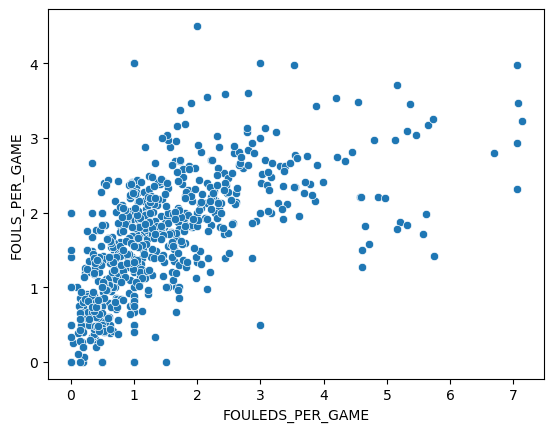

In [191]:
# Building scatter plot
sns.scatterplot(x=playerFouleds['FOULEDS_PER_GAME'], y=playerFouls['FOULS_PER_GAME'])

In [220]:
# Build dataframe for clustering
fouls_cluster_df = pd.merge(playerFouleds, playerFouls, left_index=True, right_index=True)[['FOULEDS_PER_GAME', 'FOULS_PER_GAME']]
fouls_cluster_df

,FOULEDS_PER_GAME,FOULS_PER_GAME
1713.0,1.064286,1.821429
1718.0,1.333333,0.333333
1891.0,0.220339,1.186441
1897.0,1.000000,0.000000
1938.0,2.123288,1.931507
...,...,...
1629234.0,0.434783,0.478261
1629244.0,0.421053,1.368421
1629312.0,0.200000,0.200000
1629353.0,0.600000,1.400000


In [210]:
from sklearn.cluster import KMeans

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

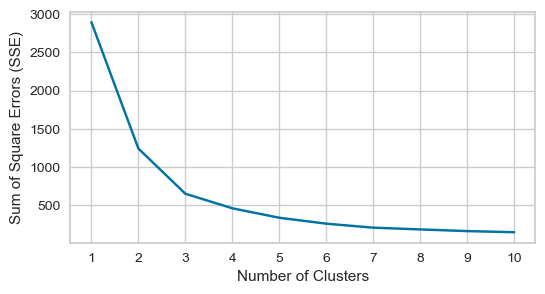

In [506]:
# Selecting optimal number of clusters by using Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(fouls_cluster_df)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(6,3))
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Square Errors (SSE)")
plt.show()

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


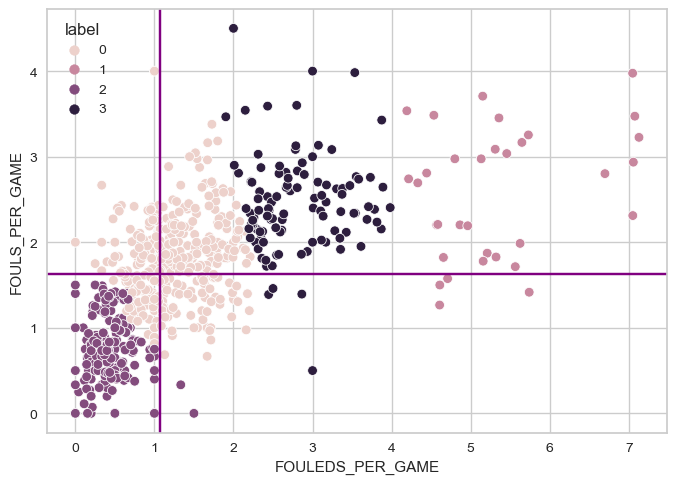

In [517]:
# K-Means Clustering
from sklearn.cluster import KMeans
KM = KMeans(n_clusters=4, random_state=42, n_init=10)
KM.fit(fouls_cluster_df)
label = KM.fit_predict(fouls_cluster_df)
fouls_cluster_df['label']=label

# Visualise cluster
sns.scatterplot(x=fouls_cluster_df['FOULEDS_PER_GAME'], y=fouls_cluster_df['FOULS_PER_GAME'], hue=fouls_cluster_df['label'])

# Add median line to plot
plt.axvline(x=fouls_cluster_df['FOULEDS_PER_GAME'].median(), color='purple')
plt.axhline(y=fouls_cluster_df['FOULS_PER_GAME'].median(), color='purple')

In [124]:
# Fouls per game, and how many fouls were committed by home teams, and away teams
df15_fouls = df_2015.groupby('GAME_ID')[['EVENTMSGTYPE', 'HOMEDESCRIPTION', 'VISITORDESCRIPTION']].apply(lambda x: x[x.EVENTMSGTYPE == 6].count())
df16_fouls = df_2016.groupby('GAME_ID')[['EVENTMSGTYPE', 'HOMEDESCRIPTION', 'VISITORDESCRIPTION']].apply(lambda x: x[x.EVENTMSGTYPE == 6].count())
df17_fouls = df_2017.groupby('GAME_ID')[['EVENTMSGTYPE', 'HOMEDESCRIPTION', 'VISITORDESCRIPTION']].apply(lambda x: x[x.EVENTMSGTYPE == 6].count())
df18_fouls = df_2018.groupby('GAME_ID')[['EVENTMSGTYPE', 'HOMEDESCRIPTION', 'VISITORDESCRIPTION']].apply(lambda x: x[x.EVENTMSGTYPE == 6].count())

df18_fouls

,EVENTMSGTYPE,HOMEDESCRIPTION,VISITORDESCRIPTION
GAME_ID,,,
21800001,40,20,20
21800002,50,29,21
21800003,44,19,25
21800004,46,21,25
21800005,42,24,18
...,...,...,...
21801226,34,14,20
21801227,33,14,19
21801228,35,13,22


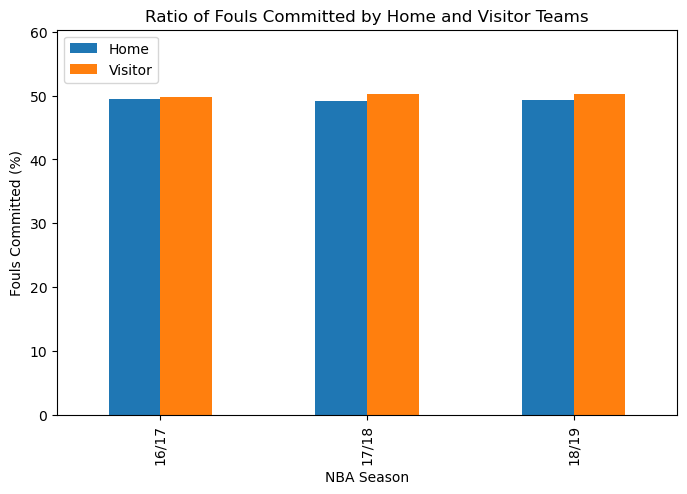

In [175]:
data = [[df16_fouls['HOMEDESCRIPTION'].sum() / df16_fouls['EVENTMSGTYPE'].sum() * 100, df16_fouls['VISITORDESCRIPTION'].sum() / df16_fouls['EVENTMSGTYPE'].sum() * 100],
        [df17_fouls['HOMEDESCRIPTION'].sum() / df17_fouls['EVENTMSGTYPE'].sum() * 100, df17_fouls['VISITORDESCRIPTION'].sum() / df17_fouls['EVENTMSGTYPE'].sum() * 100],
        [df18_fouls['HOMEDESCRIPTION'].sum() / df18_fouls['EVENTMSGTYPE'].sum() * 100, df18_fouls['VISITORDESCRIPTION'].sum() / df18_fouls['EVENTMSGTYPE'].sum() * 100]
]
total_fouls = df_2016['EVENTMSGTYPE'].value_counts()[6] + df_2017['EVENTMSGTYPE'].value_counts()[6] + df_2018['EVENTMSGTYPE'].value_counts()[6]
foulPercentage = pd.DataFrame(data, columns=['Home', "Visitor"], index=['16/17', '17/18', '18/19'])

foulPercentage.plot(kind='bar', figsize=(8,5)).legend(loc='upper left')
plt.title("Ratio of Fouls Committed by Home and Visitor Teams")
plt.xlabel("NBA Season")
plt.ylabel("Fouls Committed (%)")
plt.margins(y=0.2)

In [18]:
fouls = pd.Series({'HOME': df3['FOULED_BY_HOME'].sum() / df3['FOULS_COUNT'].sum() * 100,
                   'VISITOR': df3['FOULED_BY_VISITOR'].sum() / df3['FOULS_COUNT'].sum() * 100}
                 )

fouls.plot(kind='bar')
plt.title("Fouls committed between Home and Visitor Teams")
plt.ylabel("Fouls Committed (%)")

NameError: name 'df3' is not defined

# Classification

In [49]:
# Score Margins for each Game in the datasets
# Positive SCOREMARGIN = Home team wins
# Negative SCOREMARGIN = Visitor team wins

# 15/16 Season dataset
winners_15 = sorted_df_2015[(sorted_df_2015["EVENTMSGTYPE"] == 13) & (sorted_df_2015["PERIOD"] == 4)][['GAME_ID', 'SCOREMARGIN']]
winners_15['WINNER'] = winners_15.apply(lambda x: 
                                        'TIE' if (x['SCOREMARGIN'] == 'TIE') else 
                                        'VISITOR' if (x['SCOREMARGIN'][0] == '-') else
                                        'HOME',
                                        axis=1
                                       )
# 16/17 Season dataset
winners_16 = sorted_df_2016[(sorted_df_2016["EVENTMSGTYPE"] == 13) & (sorted_df_2016["PERIOD"] == 4)][['GAME_ID', 'SCOREMARGIN']]
winners_16['WINNER'] = winners_16.apply(lambda x: 
                                        'TIE' if (x['SCOREMARGIN'] == 'TIE') else 
                                        'VISITOR' if (x['SCOREMARGIN'][0] == '-') else
                                        'HOME',
                                        axis=1
                                       )
# 17/18 Season dataset
winners_17 = sorted_df_2017[(sorted_df_2017["EVENTMSGTYPE"] == 13) & (sorted_df_2017["PERIOD"] == 4)][['GAME_ID', 'SCOREMARGIN']]
winners_17['WINNER'] = winners_17.apply(lambda x: 
                                        'TIE' if (x['SCOREMARGIN'] == 'TIE') else 
                                        'VISITOR' if (x['SCOREMARGIN'][0] == '-') else
                                        'HOME',
                                        axis=1
                                       )
# 18/19 Season dataset
winners_18 = sorted_df_2018[(sorted_df_2018["EVENTMSGTYPE"] == 13) & (sorted_df_2018["PERIOD"] == 4)][['GAME_ID', 'SCOREMARGIN']]
winners_18['WINNER'] = winners_18.apply(lambda x: 
                                        'TIE' if (x['SCOREMARGIN'] == 'TIE') else 
                                        'VISITOR' if (x['SCOREMARGIN'][0] == '-') else
                                        'HOME',
                                        axis=1
                                       )

In [50]:
winners_15

,GAME_ID,SCOREMARGIN,WINNER
466,21500001,-12,VISITOR
949,21500002,2,HOME
1463,21500003,16,HOME
1959,21500004,-1,VISITOR
2444,21500005,17,HOME
...,...,...,...
564295,21501226,35,HOME
564734,21501227,21,HOME
565153,21501228,5,HOME
565618,21501229,9,HOME


In [51]:
# Home and Visitor Teams of each game in the dataset
# PLAYER1_TEAM_ABBREVIATION is the Home team
# PLAYER2_TEAM_ABBREVIATION is the Visitor team
schedule_2015 = sorted_df_2015[(sorted_df_2015["EVENTMSGTYPE"] == 10) & (sorted_df_2015["PERIOD"] == 1) & (sorted_df_2015['PCTIMESTRING'] == '12:00')][['GAME_ID', 'PLAYER1_TEAM_ID', 'PLAYER1_TEAM_ABBREVIATION', 'PLAYER2_TEAM_ID', 'PLAYER2_TEAM_ABBREVIATION']]
schedule_2016 = sorted_df_2016[(sorted_df_2016["EVENTMSGTYPE"] == 10) & (sorted_df_2016["PERIOD"] == 1) & (sorted_df_2016['PCTIMESTRING'] == '12:00')][['GAME_ID', 'PLAYER1_TEAM_ID', 'PLAYER1_TEAM_ABBREVIATION', 'PLAYER2_TEAM_ID', 'PLAYER2_TEAM_ABBREVIATION']]
schedule_2017 = sorted_df_2017[(sorted_df_2017["EVENTMSGTYPE"] == 10) & (sorted_df_2017["PERIOD"] == 1) & (sorted_df_2017['PCTIMESTRING'] == '12:00')][['GAME_ID', 'PLAYER1_TEAM_ID', 'PLAYER1_TEAM_ABBREVIATION', 'PLAYER2_TEAM_ID', 'PLAYER2_TEAM_ABBREVIATION']]
schedule_2018 = sorted_df_2018[(sorted_df_2018["EVENTMSGTYPE"] == 10) & (sorted_df_2018["PERIOD"] == 1) & (sorted_df_2018['PCTIMESTRING'] == '12:00')][['GAME_ID', 'PLAYER1_TEAM_ID', 'PLAYER1_TEAM_ABBREVIATION', 'PLAYER2_TEAM_ID', 'PLAYER2_TEAM_ABBREVIATION']]

In [52]:
schedule_wins_15 = pd.merge(schedule_2015, winners_15, on=['GAME_ID'])
schedule_wins_16 = pd.merge(schedule_2016, winners_16, on=['GAME_ID'])
schedule_wins_17 = pd.merge(schedule_2017, winners_17, on=['GAME_ID'])
schedule_wins_18 = pd.merge(schedule_2018, winners_18, on=['GAME_ID'])

In [53]:
schedule_wins_15

,GAME_ID,PLAYER1_TEAM_ID,PLAYER1_TEAM_ABBREVIATION,PLAYER2_TEAM_ID,PLAYER2_TEAM_ABBREVIATION,SCOREMARGIN,WINNER
0,21500001,1.610613e+09,ATL,1.610613e+09,DET,-12,VISITOR
1,21500002,1.610613e+09,CHI,1.610613e+09,CLE,2,HOME
2,21500003,1.610613e+09,GSW,1.610613e+09,NOP,16,HOME
3,21500004,1.610613e+09,ORL,1.610613e+09,WAS,-1,VISITOR
4,21500005,1.610613e+09,BOS,1.610613e+09,PHI,17,HOME
...,...,...,...,...,...,...,...
1225,21501226,1.610613e+09,MIN,1.610613e+09,NOP,35,HOME
1226,21501227,1.610613e+09,GSW,1.610613e+09,MEM,21,HOME
1227,21501228,1.610613e+09,LAL,1.610613e+09,UTA,5,HOME
1228,21501229,1.610613e+09,PHX,1.610613e+09,LAC,9,HOME


In [60]:
# Score Margins for each Game in the datasets
# Positive SCOREMARGIN = Home team wins
# Negative SCOREMARGIN = Visitor team wins

# 15/16 Season dataset
results_15 = schedule_wins_15[['GAME_ID', 'PLAYER1_TEAM_ABBREVIATION', 'PLAYER2_TEAM_ABBREVIATION', 'WINNER']][schedule_wins_15['WINNER'] != 'TIE']
results_15['WINNER_TEAM'] = results_15.apply(lambda x: 
                                        'TIE' if (x['WINNER'] == 'TIE') else 
                                        x['PLAYER2_TEAM_ABBREVIATION'] if (x['WINNER'] == 'VISITOR') else
                                        x['PLAYER1_TEAM_ABBREVIATION'],
                                        axis=1
                                       )
# 16/17 Season dataset
results_16 = schedule_wins_16[['GAME_ID', 'PLAYER1_TEAM_ABBREVIATION', 'PLAYER2_TEAM_ABBREVIATION', 'WINNER']][schedule_wins_16['WINNER'] != 'TIE']
results_16['WINNER_TEAM'] = results_16.apply(lambda x: 
                                        'TIE' if (x['WINNER'] == 'TIE') else 
                                        x['PLAYER2_TEAM_ABBREVIATION'] if (x['WINNER'] == 'VISITOR') else
                                        x['PLAYER1_TEAM_ABBREVIATION'],
                                        axis=1
                                       )
# 17/18 Season dataset
results_17 = schedule_wins_17[['GAME_ID', 'PLAYER1_TEAM_ABBREVIATION', 'PLAYER2_TEAM_ABBREVIATION', 'WINNER']][schedule_wins_17['WINNER'] != 'TIE']
results_17['WINNER_TEAM'] = results_17.apply(lambda x: 
                                        'TIE' if (x['WINNER'] == 'TIE') else 
                                        x['PLAYER2_TEAM_ABBREVIATION'] if (x['WINNER'] == 'VISITOR') else
                                        x['PLAYER1_TEAM_ABBREVIATION'],
                                        axis=1
                                       )
# 18/19 Season dataset
results_18 = schedule_wins_18[['GAME_ID', 'PLAYER1_TEAM_ABBREVIATION', 'PLAYER2_TEAM_ABBREVIATION', 'WINNER']][schedule_wins_18['WINNER'] != 'TIE']
results_18['WINNER_TEAM'] = results_18.apply(lambda x: 
                                        'TIE' if (x['WINNER'] == 'TIE') else 
                                        x['PLAYER2_TEAM_ABBREVIATION'] if (x['WINNER'] == 'VISITOR') else
                                        x['PLAYER1_TEAM_ABBREVIATION'],
                                        axis=1
                                       )

In [65]:
win_counts_15 = results_15.WINNER_TEAM.value_counts()
win_counts_16 = results_16.WINNER_TEAM.value_counts()
win_counts_17 = results_17.WINNER_TEAM.value_counts()
win_counts_18 = results_18.WINNER_TEAM.value_counts()

In [120]:
win_counts_18

MIL    59
GSW    57
TOR    54
DEN    52
HOU    51
UTA    50
PHI    49
POR    49
OKC    47
IND    47
BOS    45
SAS    44
LAC    43
ORL    41
SAC    39
CHA    38
MIA    38
BKN    37
DET    36
LAL    35
MIN    33
DAL    32
NOP    32
MEM    30
WAS    29
ATL    26
CHI    19
CLE    19
PHX    16
NYK    15
Name: WINNER_TEAM, dtype: int64

In [128]:
# 2015/16 Schedule with competing teams and their respective foul counts
schedule_withFouls_15 = pd.merge(df15_fouls, schedule_2015, on= ['GAME_ID'])
schedule_withFouls_15.columns = ['GAME_ID', 'TOTAL_FOULS', 'HOME_FOULS', 'VISITOR_FOULS', 'HOME_ID', 'HOME_NAME', 'VISITOR_ID', 'VISITOR_NAME']
schedule_withFouls_15['FOULS_MARGIN'] = schedule_withFouls_15.apply(lambda x: x['HOME_FOULS'] - x['VISITOR_FOULS'], axis=1)

# 2015/16 Schedule with competing teams and their respective foul counts, and the final score margin and winner
schedule_fouls_wins_15 = pd.merge(schedule_withFouls_15, winners_15, on=['GAME_ID'])

In [129]:
# 2016/17 Schedule with competing teams and their respective foul counts
schedule_withFouls_16 = pd.merge(df16_fouls, schedule_2016, on= ['GAME_ID'])
schedule_withFouls_16.columns = ['GAME_ID', 'TOTAL_FOULS', 'HOME_FOULS', 'VISITOR_FOULS', 'HOME_ID', 'HOME_NAME', 'VISITOR_ID', 'VISITOR_NAME']
schedule_withFouls_16['FOULS_MARGIN'] = schedule_withFouls_16.apply(lambda x: x['HOME_FOULS'] - x['VISITOR_FOULS'], axis=1)

# 2016/17 Schedule with competing teams and their respective foul counts, and the final score margin and winner
schedule_fouls_wins_16 = pd.merge(schedule_withFouls_16, winners_16, on=['GAME_ID'])

In [130]:
# 2017/18 Schedule with competing teams and their respective foul counts
schedule_withFouls_17 = pd.merge(df17_fouls, schedule_2017, on= ['GAME_ID'])
schedule_withFouls_17.columns = ['GAME_ID', 'TOTAL_FOULS', 'HOME_FOULS', 'VISITOR_FOULS', 'HOME_ID', 'HOME_NAME', 'VISITOR_ID', 'VISITOR_NAME']
schedule_withFouls_17['FOULS_MARGIN'] = schedule_withFouls_17.apply(lambda x: x['HOME_FOULS'] - x['VISITOR_FOULS'], axis=1)

# 2017/18 Schedule with competing teams and their respective foul counts, and the final score margin and winner
schedule_fouls_wins_17 = pd.merge(schedule_withFouls_17, winners_17, on=['GAME_ID'])

In [131]:
# 2018/19 Schedule with competing teams and their respective foul counts
schedule_withFouls_18 = pd.merge(df18_fouls, schedule_2018, on= ['GAME_ID'])
schedule_withFouls_18.columns = ['GAME_ID', 'TOTAL_FOULS', 'HOME_FOULS', 'VISITOR_FOULS', 'HOME_ID', 'HOME_NAME', 'VISITOR_ID', 'VISITOR_NAME']
schedule_withFouls_18['FOULS_MARGIN'] = schedule_withFouls_18.apply(lambda x: x['HOME_FOULS'] - x['VISITOR_FOULS'], axis=1)

# 2018/19 Schedule with competing teams and their respective foul counts, and the final score margin and winner
schedule_fouls_wins_18 = pd.merge(schedule_withFouls_18, winners_18, on=['GAME_ID'])

In [132]:
# Combine 16/17, 17/18, 18/19 dataframes into one single dataframe
aggregate_schedule_fouls_wins = pd.concat([schedule_fouls_wins_16, schedule_fouls_wins_17, schedule_fouls_wins_18])
aggregate_schedule_fouls_wins

,GAME_ID,TOTAL_FOULS,HOME_FOULS,VISITOR_FOULS,HOME_ID,HOME_NAME,VISITOR_ID,VISITOR_NAME,FOULS_MARGIN,SCOREMARGIN,WINNER
0,21600009,50,27,23,1.610613e+09,MEM,1.610613e+09,MIN,4,4,HOME
1,21600011,45,22,23,1.610613e+09,PHI,1.610613e+09,OKC,-1,-6,VISITOR
2,21600020,26,12,13,1.610613e+09,DET,1.610613e+09,ORL,-1,26,HOME
3,21600021,55,24,30,1.610613e+09,OKC,1.610613e+09,PHX,-6,TIE,TIE
4,21600028,57,26,31,1.610613e+09,NYK,1.610613e+09,MEM,-5,7,HOME
...,...,...,...,...,...,...,...,...,...,...,...
1224,21801226,34,14,20,1.610613e+09,MIL,1.610613e+09,OKC,-6,-11,VISITOR
1225,21801227,33,14,19,1.610613e+09,SAS,1.610613e+09,DAL,-5,11,HOME
1226,21801228,35,13,22,1.610613e+09,DEN,1.610613e+09,MIN,-9,4,HOME
1227,21801229,51,27,24,1.610613e+09,LAC,1.610613e+09,UTA,3,TIE,TIE


In [134]:
from sklearn.metrics import accuracy_score
# Classifier for predicting winner of an NBA game based on teams, and the amount of fouls committed by each team
X_train = aggregate_schedule_fouls_wins[['TOTAL_FOULS', 'HOME_FOULS', 'VISITOR_FOULS', 'HOME_ID', 'VISITOR_ID', 'FOULS_MARGIN']]
y_train = aggregate_schedule_fouls_wins['WINNER']

X_test = schedule_fouls_wins_15[['TOTAL_FOULS', 'HOME_FOULS', 'VISITOR_FOULS', 'HOME_ID', 'VISITOR_ID', 'FOULS_MARGIN']]
y_test = schedule_fouls_wins_15['WINNER']

# Gaussian Naive Bayesian
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.540650406504065


In [135]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5008130081300813


# Shot Attempts


In [136]:
# Fouls per game, and how many fouls were committed by home teams, and away teams
df15_shotAttempts = df_2015.groupby('GAME_ID')[['EVENTMSGTYPE', 'HOMEDESCRIPTION', 'VISITORDESCRIPTION']].apply(lambda x: x[(x.EVENTMSGTYPE == 1) | (x.EVENTMSGTYPE == 2)].count())
df16_shotAttempts = df_2016.groupby('GAME_ID')[['EVENTMSGTYPE', 'HOMEDESCRIPTION', 'VISITORDESCRIPTION']].apply(lambda x: x[(x.EVENTMSGTYPE == 1) | (x.EVENTMSGTYPE == 2)].count())
df17_shotAttempts = df_2017.groupby('GAME_ID')[['EVENTMSGTYPE', 'HOMEDESCRIPTION', 'VISITORDESCRIPTION']].apply(lambda x: x[(x.EVENTMSGTYPE == 1) | (x.EVENTMSGTYPE == 2)].count())
df18_shotAttempts = df_2018.groupby('GAME_ID')[['EVENTMSGTYPE', 'HOMEDESCRIPTION', 'VISITORDESCRIPTION']].apply(lambda x: x[(x.EVENTMSGTYPE == 1) | (x.EVENTMSGTYPE == 2)].count())

In [139]:
# 2015/16 Schedule with competing teams and their respective shot attempt counts
schedule_withShotAttempts_15 = pd.merge(df15_shotAttempts, schedule_2015, on= ['GAME_ID'])
schedule_withShotAttempts_15.columns = ['GAME_ID', 'TOTAL_SHOTS', 'HOME_SHOTS', 'VISITOR_SHOTS', 'HOME_ID', 'HOME_NAME', 'VISITOR_ID', 'VISITOR_NAME']
schedule_withShotAttempts_15['SHOTS_MARGIN'] = schedule_withShotAttempts_15.apply(lambda x: x['HOME_SHOTS'] - x['VISITOR_SHOTS'], axis=1)

# 2015/16 Schedule with competing teams and their respective shot attempt counts, and the final score margin and winner
schedule_shots_wins_15 = pd.merge(schedule_withShotAttempts_15, winners_15, on=['GAME_ID'])

In [140]:
# 2016/17 Schedule with competing teams and their respective shot attempt counts
schedule_withShotAttempts_16 = pd.merge(df16_shotAttempts, schedule_2016, on= ['GAME_ID'])
schedule_withShotAttempts_16.columns = ['GAME_ID', 'TOTAL_SHOTS', 'HOME_SHOTS', 'VISITOR_SHOTS', 'HOME_ID', 'HOME_NAME', 'VISITOR_ID', 'VISITOR_NAME']
schedule_withShotAttempts_16['SHOTS_MARGIN'] = schedule_withShotAttempts_16.apply(lambda x: x['HOME_SHOTS'] - x['VISITOR_SHOTS'], axis=1)

# 2016/17 Schedule with competing teams and their respective shot attempt counts, and the final score margin and winner
schedule_shots_wins_16 = pd.merge(schedule_withShotAttempts_16, winners_16, on=['GAME_ID'])

In [141]:
# 2017/18 Schedule with competing teams and their respective shot attempt counts
schedule_withShotAttempts_17 = pd.merge(df17_shotAttempts, schedule_2017, on= ['GAME_ID'])
schedule_withShotAttempts_17.columns = ['GAME_ID', 'TOTAL_SHOTS', 'HOME_SHOTS', 'VISITOR_SHOTS', 'HOME_ID', 'HOME_NAME', 'VISITOR_ID', 'VISITOR_NAME']
schedule_withShotAttempts_17['SHOTS_MARGIN'] = schedule_withShotAttempts_17.apply(lambda x: x['HOME_SHOTS'] - x['VISITOR_SHOTS'], axis=1)

# 2017/18 Schedule with competing teams and their respective shot attempt counts, and the final score margin and winner
schedule_shots_wins_17 = pd.merge(schedule_withShotAttempts_17, winners_17, on=['GAME_ID'])

In [142]:
# 2018/19 Schedule with competing teams and their respective shot attempt counts
schedule_withShotAttempts_18 = pd.merge(df18_shotAttempts, schedule_2018, on= ['GAME_ID'])
schedule_withShotAttempts_18.columns = ['GAME_ID', 'TOTAL_SHOTS', 'HOME_SHOTS', 'VISITOR_SHOTS', 'HOME_ID', 'HOME_NAME', 'VISITOR_ID', 'VISITOR_NAME']
schedule_withShotAttempts_18['SHOTS_MARGIN'] = schedule_withShotAttempts_18.apply(lambda x: x['HOME_SHOTS'] - x['VISITOR_SHOTS'], axis=1)

# 2018/19 Schedule with competing teams and their respective shot attempt counts, and the final score margin and winner
schedule_shots_wins_18 = pd.merge(schedule_withShotAttempts_18, winners_18, on=['GAME_ID'])

In [143]:
# Combine 16/17, 17/18, 18/19 dataframes into one single dataframe
aggregate_schedule_shots_wins = pd.concat([schedule_shots_wins_16, schedule_shots_wins_17, schedule_shots_wins_18])
aggregate_schedule_shots_wins

,GAME_ID,TOTAL_SHOTS,HOME_SHOTS,VISITOR_SHOTS,HOME_ID,HOME_NAME,VISITOR_ID,VISITOR_NAME,SHOTS_MARGIN,SCOREMARGIN,WINNER
0,21600009,166,91,91,1.610613e+09,MEM,1.610613e+09,MIN,0,4,HOME
1,21600011,178,94,97,1.610613e+09,PHI,1.610613e+09,OKC,-3,-6,VISITOR
2,21600020,190,99,98,1.610613e+09,DET,1.610613e+09,ORL,1,26,HOME
3,21600021,190,99,97,1.610613e+09,OKC,1.610613e+09,PHX,2,TIE,TIE
4,21600028,162,80,88,1.610613e+09,NYK,1.610613e+09,MEM,-8,7,HOME
...,...,...,...,...,...,...,...,...,...,...,...
1224,21801226,199,101,102,1.610613e+09,MIL,1.610613e+09,OKC,-1,-11,VISITOR
1225,21801227,179,90,95,1.610613e+09,SAS,1.610613e+09,DAL,-5,11,HOME
1226,21801228,178,91,91,1.610613e+09,DEN,1.610613e+09,MIN,0,4,HOME
1227,21801229,212,111,117,1.610613e+09,LAC,1.610613e+09,UTA,-6,TIE,TIE


In [212]:
from sklearn.metrics import accuracy_score
# Classifier for predicting winner of an NBA game based on teams, and the amount of fouls committed by each team
# X_train = aggregate_schedule_shots_wins[['TOTAL_SHOTS', 'HOME_SHOTS', 'VISITOR_SHOTS', 'HOME_ID', 'VISITOR_ID', 'SHOTS_MARGIN']]
# y_train = aggregate_schedule_shots_wins['WINNER']

# X_test = schedule_shots_wins_15[['TOTAL_SHOTS', 'HOME_SHOTS', 'VISITOR_SHOTS', 'HOME_ID', 'VISITOR_ID', 'SHOTS_MARGIN']]
# y_test = schedule_shots_wins_15['WINNER']

train_set = schedule_shots_wins_15[['HOME_SHOTS', 'VISITOR_SHOTS', 'HOME_ID', 'VISITOR_ID']]
test_set = schedule_shots_wins_15['WINNER']
X_train, X_test, y_train, y_test = train_test_split(train_set, test_set, test_size=0.33, random_state=0)
# Gaussian Naive Bayesian
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5665024630541872


In [146]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5130081300813009


In [147]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
for max_d in range(1,30):
  model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(f"The Training Accuracy for max_depth {max_d} is:", accuracy_score(y_test, y_pred))

The Training Accuracy for max_depth 1 is: 0.5577235772357724
The Training Accuracy for max_depth 2 is: 0.5577235772357724
The Training Accuracy for max_depth 3 is: 0.5577235772357724
The Training Accuracy for max_depth 4 is: 0.5560975609756098
The Training Accuracy for max_depth 5 is: 0.5544715447154471
The Training Accuracy for max_depth 6 is: 0.5536585365853659
The Training Accuracy for max_depth 7 is: 0.551219512195122
The Training Accuracy for max_depth 8 is: 0.5601626016260163
The Training Accuracy for max_depth 9 is: 0.5617886178861788
The Training Accuracy for max_depth 10 is: 0.5617886178861788
The Training Accuracy for max_depth 11 is: 0.5650406504065041
The Training Accuracy for max_depth 12 is: 0.5544715447154471
The Training Accuracy for max_depth 13 is: 0.5577235772357724
The Training Accuracy for max_depth 14 is: 0.5390243902439025
The Training Accuracy for max_depth 15 is: 0.5398373983739837
The Training Accuracy for max_depth 16 is: 0.5341463414634147
The Training Accur

# Shot Efficiency

In [148]:
df15_shotEfficiencies = df_2015.groupby('GAME_ID')[['EVENTMSGTYPE', 'HOMEDESCRIPTION', 'VISITORDESCRIPTION']].apply(lambda x: (x[x.EVENTMSGTYPE == 1].count()) / (x[(x.EVENTMSGTYPE == 1) | (x.EVENTMSGTYPE == 2)].count()))
df16_shotEfficiencies = df_2016.groupby('GAME_ID')[['EVENTMSGTYPE', 'HOMEDESCRIPTION', 'VISITORDESCRIPTION']].apply(lambda x: (x[x.EVENTMSGTYPE == 1].count()) / (x[(x.EVENTMSGTYPE == 1) | (x.EVENTMSGTYPE == 2)].count()))
df17_shotEfficiencies = df_2017.groupby('GAME_ID')[['EVENTMSGTYPE', 'HOMEDESCRIPTION', 'VISITORDESCRIPTION']].apply(lambda x: (x[x.EVENTMSGTYPE == 1].count()) / (x[(x.EVENTMSGTYPE == 1) | (x.EVENTMSGTYPE == 2)].count()))
df18_shotEfficiencies = df_2018.groupby('GAME_ID')[['EVENTMSGTYPE', 'HOMEDESCRIPTION', 'VISITORDESCRIPTION']].apply(lambda x: (x[x.EVENTMSGTYPE == 1].count()) / (x[(x.EVENTMSGTYPE == 1) | (x.EVENTMSGTYPE == 2)].count()))

df15_shotEfficiencies = df15_shotEfficiencies.drop('EVENTMSGTYPE', axis=1)
df16_shotEfficiencies = df16_shotEfficiencies.drop('EVENTMSGTYPE', axis=1)
df17_shotEfficiencies = df17_shotEfficiencies.drop('EVENTMSGTYPE', axis=1)
df18_shotEfficiencies = df18_shotEfficiencies.drop('EVENTMSGTYPE', axis=1)

In [149]:
# 2015/16 Schedule with competing teams and their respective shot efficiency
schedule_withShotEfficiencies_15 = pd.merge(df15_shotEfficiencies, schedule_2015, on= ['GAME_ID'])
schedule_withShotEfficiencies_15.columns = ['GAME_ID', 'HOME_EFFICIENCY', 'VISITOR_EFFICIENCY', 'HOME_ID', 'HOME_NAME', 'VISITOR_ID', 'VISITOR_NAME']

# 2015/16 Schedule with competing teams and their respective shot efficiency, and the final score margin and winner
schedule_efficiency_wins_15 = pd.merge(schedule_withShotEfficiencies_15, winners_15, on=['GAME_ID'])

In [150]:
# 2016/17 Schedule with competing teams and their respective shot efficiency
schedule_withShotEfficiencies_16 = pd.merge(df16_shotEfficiencies, schedule_2016, on= ['GAME_ID'])
schedule_withShotEfficiencies_16.columns = ['GAME_ID', 'HOME_EFFICIENCY', 'VISITOR_EFFICIENCY', 'HOME_ID', 'HOME_NAME', 'VISITOR_ID', 'VISITOR_NAME']

# 2016/17 Schedule with competing teams and their respective shot efficiency, and the final score margin and winner
schedule_efficiency_wins_16 = pd.merge(schedule_withShotEfficiencies_16, winners_16, on=['GAME_ID'])

In [151]:
# 2017/18 Schedule with competing teams and their respective shot efficiency
schedule_withShotEfficiencies_17 = pd.merge(df17_shotEfficiencies, schedule_2017, on= ['GAME_ID'])
schedule_withShotEfficiencies_17.columns = ['GAME_ID', 'HOME_EFFICIENCY', 'VISITOR_EFFICIENCY', 'HOME_ID', 'HOME_NAME', 'VISITOR_ID', 'VISITOR_NAME']

# 2017/18 Schedule with competing teams and their respective shot efficiency, and the final score margin and winner
schedule_efficiency_wins_17 = pd.merge(schedule_withShotEfficiencies_17, winners_17, on=['GAME_ID'])

In [152]:
# 2015/16 Schedule with competing teams and their respective shot efficiency
schedule_withShotEfficiencies_18 = pd.merge(df18_shotEfficiencies, schedule_2018, on= ['GAME_ID'])
schedule_withShotEfficiencies_18.columns = ['GAME_ID', 'HOME_EFFICIENCY', 'VISITOR_EFFICIENCY', 'HOME_ID', 'HOME_NAME', 'VISITOR_ID', 'VISITOR_NAME']

# 2015/16 Schedule with competing teams and their respective shot efficiency, and the final score margin and winner
schedule_efficiency_wins_18 = pd.merge(schedule_withShotEfficiencies_18, winners_18, on=['GAME_ID'])

In [153]:
# Combine 16/17, 17/18, 18/19 dataframes into one single dataframe
aggregate_schedule_efficiency_wins = pd.concat([schedule_efficiency_wins_16, schedule_efficiency_wins_17, schedule_efficiency_wins_18])
aggregate_schedule_efficiency_wins

,GAME_ID,HOME_EFFICIENCY,VISITOR_EFFICIENCY,HOME_ID,HOME_NAME,VISITOR_ID,VISITOR_NAME,SCOREMARGIN,WINNER
0,21600009,0.395604,0.395604,1.610613e+09,MEM,1.610613e+09,MIN,4,HOME
1,21600011,0.382979,0.402062,1.610613e+09,PHI,1.610613e+09,OKC,-6,VISITOR
2,21600020,0.484848,0.336735,1.610613e+09,DET,1.610613e+09,ORL,26,HOME
3,21600021,0.404040,0.432990,1.610613e+09,OKC,1.610613e+09,PHX,TIE,TIE
4,21600028,0.500000,0.420455,1.610613e+09,NYK,1.610613e+09,MEM,7,HOME
...,...,...,...,...,...,...,...,...,...
1224,21801226,0.425743,0.470588,1.610613e+09,MIL,1.610613e+09,OKC,-11,VISITOR
1225,21801227,0.455556,0.389474,1.610613e+09,SAS,1.610613e+09,DAL,11,HOME
1226,21801228,0.428571,0.428571,1.610613e+09,DEN,1.610613e+09,MIN,4,HOME
1227,21801229,0.486486,0.401709,1.610613e+09,LAC,1.610613e+09,UTA,TIE,TIE


In [116]:
average_home_shotEfficiencies_17 = schedule_withShotEfficiencies_17.groupby('HOME_NAME')['HOME_EFFICIENCY'].mean()
average_visitor_shotEfficiencies_17 = schedule_withShotEfficiencies_17.groupby('VISITOR_NAME')['VISITOR_EFFICIENCY'].mean()
average_shotEfficiencies_17 = pd.concat([average_home_shotEfficiencies_17, average_visitor_shotEfficiencies_17], axis=1).mean(axis=1)

average_home_shotEfficiencies_18 = schedule_withShotEfficiencies_18.groupby('HOME_NAME')['HOME_EFFICIENCY'].mean()
average_visitor_shotEfficiencies_18 = schedule_withShotEfficiencies_18.groupby('VISITOR_NAME')['VISITOR_EFFICIENCY'].mean()
average_shotEfficiencies_18 = pd.concat([average_home_shotEfficiencies_18, average_visitor_shotEfficiencies_18], axis=1).mean(axis=1)

In [119]:
average_shotEfficiencies_18

ATL    0.428113
BKN    0.430115
BOS    0.440112
CHA    0.425442
CHI    0.433165
CLE    0.433008
DAL    0.426666
DEN    0.445507
DET    0.421563
GSW    0.458562
HOU    0.426763
IND    0.450699
LAC    0.448394
LAL    0.444760
MEM    0.423414
MIA    0.425443
MIL    0.447856
MIN    0.433577
NOP    0.448270
NYK    0.409531
OKC    0.431056
ORL    0.428131
PHI    0.445636
PHX    0.434447
POR    0.444520
SAC    0.443325
SAS    0.455860
TOR    0.448770
UTA    0.438781
WAS    0.445639
dtype: float64

In [117]:
efficiency_wins_17 = pd.concat([average_shotEfficiencies_17, win_counts_17], axis=1)
efficiency_wins_17.columns = ['AVERAGE_SHOTEFFICIENCY', 'WINS']
print(efficiency_wins_17['AVERAGE_SHOTEFFICIENCY'].corr(efficiency_wins_17['WINS']))

efficiency_wins_18 = pd.concat([average_shotEfficiencies_18, win_counts_18], axis=1)
efficiency_wins_18.columns = ['AVERAGE_SHOTEFFICIENCY', 'WINS']
print(efficiency_wins_18['AVERAGE_SHOTEFFICIENCY'].corr(efficiency_wins_18['WINS']))

0.569904199791632
0.5577926465650369


In [121]:
efficiency_wins_18

,AVERAGE_SHOTEFFICIENCY,WINS
ATL,0.428113,26
BKN,0.430115,37
BOS,0.440112,45
CHA,0.425442,38
CHI,0.433165,19
CLE,0.433008,19
DAL,0.426666,32
DEN,0.445507,52
DET,0.421563,36
GSW,0.458562,57


<AxesSubplot:xlabel='AVERAGE_SHOTEFFICIENCY', ylabel='WINS'>

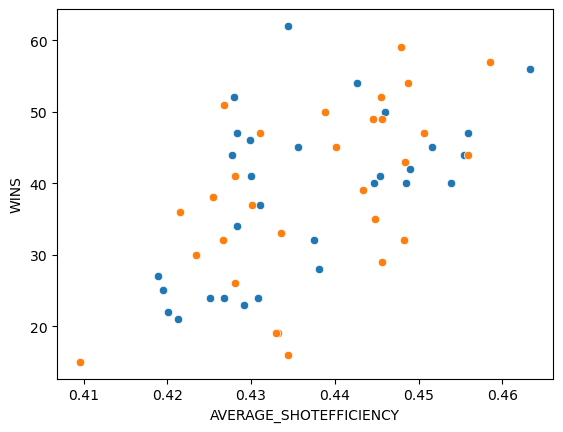

In [118]:
sns.scatterplot(x=efficiency_wins_17['AVERAGE_SHOTEFFICIENCY'], y=efficiency_wins_17['WINS'])
sns.scatterplot(x=efficiency_wins_18['AVERAGE_SHOTEFFICIENCY'], y=efficiency_wins_18['WINS'])

In [155]:
from sklearn.metrics import accuracy_score
# Classifier for predicting winner of an NBA game based on teams, and the amount of fouls committed by each team
X_train = aggregate_schedule_efficiency_wins[['HOME_EFFICIENCY', 'VISITOR_EFFICIENCY', 'HOME_ID', 'VISITOR_ID']]
y_train = aggregate_schedule_efficiency_wins['WINNER']

X_test = schedule_efficiency_wins_15[['HOME_EFFICIENCY', 'VISITOR_EFFICIENCY', 'HOME_ID', 'VISITOR_ID']]
y_test = schedule_efficiency_wins_15['WINNER']

# Gaussian Naive Bayesian
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7707317073170732


In [157]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7284552845528456


In [158]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
for max_d in range(1,21):
  model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(f"The Training Accuracy for max_depth {max_d} is:", accuracy_score(y_test, y_pred))

The Training Accuracy for max_depth 1 is: 0.6463414634146342
The Training Accuracy for max_depth 2 is: 0.7146341463414634
The Training Accuracy for max_depth 3 is: 0.7455284552845528
The Training Accuracy for max_depth 4 is: 0.7528455284552845
The Training Accuracy for max_depth 5 is: 0.7617886178861789
The Training Accuracy for max_depth 6 is: 0.7447154471544716
The Training Accuracy for max_depth 7 is: 0.740650406504065
The Training Accuracy for max_depth 8 is: 0.7268292682926829
The Training Accuracy for max_depth 9 is: 0.7227642276422764
The Training Accuracy for max_depth 10 is: 0.7056910569105691
The Training Accuracy for max_depth 11 is: 0.6943089430894309
The Training Accuracy for max_depth 12 is: 0.6991869918699187
The Training Accuracy for max_depth 13 is: 0.6861788617886179
The Training Accuracy for max_depth 14 is: 0.6764227642276422
The Training Accuracy for max_depth 15 is: 0.6682926829268293
The Training Accuracy for max_depth 16 is: 0.6626016260162602
The Training Accur

In [177]:
# Fouls per game, and how many fouls were committed by home teams, and away teams
df15_rebounds = df_2015.groupby('GAME_ID')[['EVENTMSGTYPE', 'HOMEDESCRIPTION', 'VISITORDESCRIPTION']].apply(lambda x: x[(x.EVENTMSGTYPE == 4)].count())
df16_rebounds = df_2016.groupby('GAME_ID')[['EVENTMSGTYPE', 'HOMEDESCRIPTION', 'VISITORDESCRIPTION']].apply(lambda x: x[(x.EVENTMSGTYPE == 4)].count())
df17_rebounds = df_2017.groupby('GAME_ID')[['EVENTMSGTYPE', 'HOMEDESCRIPTION', 'VISITORDESCRIPTION']].apply(lambda x: x[(x.EVENTMSGTYPE == 4)].count())
df18_rebounds = df_2018.groupby('GAME_ID')[['EVENTMSGTYPE', 'HOMEDESCRIPTION', 'VISITORDESCRIPTION']].apply(lambda x: x[(x.EVENTMSGTYPE == 4)].count())

In [178]:
# 2015/16 Schedule with competing teams and their respective shot attempt counts
schedule_rebounds_15 = pd.merge(df15_rebounds, schedule_2015, on= ['GAME_ID'])
schedule_rebounds_15.columns = ['GAME_ID', 'TOTAL_REBOUNDS', 'HOME_REBOUNDS', 'VISITOR_REBOUNDS', 'HOME_ID', 'HOME_NAME', 'VISITOR_ID', 'VISITOR_NAME']
schedule_rebounds_15['REBOUNDS_MARGIN'] = schedule_rebounds_15.apply(lambda x: x['HOME_REBOUNDS'] - x['VISITOR_REBOUNDS'], axis=1)

# 2015/16 Schedule with competing teams and their respective shot attempt counts, and the final score margin and winner
schedule_rebounds_wins_15 = pd.merge(schedule_rebounds_15, winners_15, on=['GAME_ID'])

In [179]:
# 2016/17 Schedule with competing teams and their respective shot attempt counts
schedule_rebounds_16 = pd.merge(df16_rebounds, schedule_2016, on= ['GAME_ID'])
schedule_rebounds_16.columns = ['GAME_ID', 'TOTAL_REBOUNDS', 'HOME_REBOUNDS', 'VISITOR_REBOUNDS', 'HOME_ID', 'HOME_NAME', 'VISITOR_ID', 'VISITOR_NAME']
schedule_rebounds_16['REBOUNDS_MARGIN'] = schedule_rebounds_16.apply(lambda x: x['HOME_REBOUNDS'] - x['VISITOR_REBOUNDS'], axis=1)

# 2016/17 Schedule with competing teams and their respective shot attempt counts, and the final score margin and winner
schedule_rebounds_wins_16 = pd.merge(schedule_rebounds_16, winners_16, on=['GAME_ID'])

In [180]:
# 2017/18 Schedule with competing teams and their respective shot attempt counts
schedule_rebounds_17 = pd.merge(df17_rebounds, schedule_2017, on= ['GAME_ID'])
schedule_rebounds_17.columns = ['GAME_ID', 'TOTAL_REBOUNDS', 'HOME_REBOUNDS', 'VISITOR_REBOUNDS', 'HOME_ID', 'HOME_NAME', 'VISITOR_ID', 'VISITOR_NAME']
schedule_rebounds_17['REBOUNDS_MARGIN'] = schedule_rebounds_17.apply(lambda x: x['HOME_REBOUNDS'] - x['VISITOR_REBOUNDS'], axis=1)

# 2017/18 Schedule with competing teams and their respective shot attempt counts, and the final score margin and winner
schedule_rebounds_wins_17 = pd.merge(schedule_rebounds_17, winners_17, on=['GAME_ID'])

In [181]:
# 2018/19 Schedule with competing teams and their respective shot attempt counts
schedule_rebounds_18 = pd.merge(df18_rebounds, schedule_2018, on= ['GAME_ID'])
schedule_rebounds_18.columns = ['GAME_ID', 'TOTAL_REBOUNDS', 'HOME_REBOUNDS', 'VISITOR_REBOUNDS', 'HOME_ID', 'HOME_NAME', 'VISITOR_ID', 'VISITOR_NAME']
schedule_rebounds_18['REBOUNDS_MARGIN'] = schedule_rebounds_18.apply(lambda x: x['HOME_REBOUNDS'] - x['VISITOR_REBOUNDS'], axis=1)

# 2018/19 Schedule with competing teams and their respective shot attempt counts, and the final score margin and winner
schedule_rebounds_wins_18 = pd.merge(schedule_rebounds_18, winners_18, on=['GAME_ID'])

In [182]:
# Combine 16/17, 17/18, 18/19 dataframes into one single dataframe
aggregate_schedule_rebounds_wins = pd.concat([schedule_rebounds_wins_16, schedule_rebounds_wins_17, schedule_rebounds_wins_18])
aggregate_schedule_rebounds_wins

,GAME_ID,TOTAL_REBOUNDS,HOME_REBOUNDS,VISITOR_REBOUNDS,HOME_ID,HOME_NAME,VISITOR_ID,VISITOR_NAME,REBOUNDS_MARGIN,SCOREMARGIN,WINNER
0,21600009,111,55,56,1.610613e+09,MEM,1.610613e+09,MIN,-1,4,HOME
1,21600011,117,56,61,1.610613e+09,PHI,1.610613e+09,OKC,-5,-6,VISITOR
2,21600020,114,62,52,1.610613e+09,DET,1.610613e+09,ORL,10,26,HOME
3,21600021,129,72,57,1.610613e+09,OKC,1.610613e+09,PHX,15,TIE,TIE
4,21600028,104,54,50,1.610613e+09,NYK,1.610613e+09,MEM,4,7,HOME
...,...,...,...,...,...,...,...,...,...,...,...
1224,21801226,119,63,56,1.610613e+09,MIL,1.610613e+09,OKC,7,-11,VISITOR
1225,21801227,107,60,47,1.610613e+09,SAS,1.610613e+09,DAL,13,11,HOME
1226,21801228,108,61,47,1.610613e+09,DEN,1.610613e+09,MIN,14,4,HOME
1227,21801229,122,58,64,1.610613e+09,LAC,1.610613e+09,UTA,-6,TIE,TIE


In [215]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split # Import train_test_split functionn

# # Classifier for predicting winner of an NBA game based on teams, and the amount of fouls committed by each team
# X_train = aggregate_schedule_rebounds_wins[['HOME_REBOUNDS', 'VISITOR_REBOUNDS', 'HOME_ID', 'VISITOR_ID']]
# y_train = aggregate_schedule_rebounds_wins['WINNER']

# X_test = schedule_rebounds_wins_15[['HOME_REBOUNDS', 'VISITOR_REBOUNDS', 'HOME_ID', 'VISITOR_ID']]
# y_test = schedule_rebounds_wins_15['WINNER']

train_set = schedule_rebounds_wins_18[['HOME_REBOUNDS', 'VISITOR_REBOUNDS', 'HOME_ID', 'VISITOR_ID']]
test_set = schedule_rebounds_wins_18['WINNER']
X_train, X_test, y_train, y_test = train_test_split(train_set, test_set, test_size=0.2, random_state=0)
# Gaussian Naive Bayesian
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6585365853658537


In [187]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

for max_d in range(1,30):
    rf = RandomForestClassifier(max_depth=max_d)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"The Training Accuracy for max_depth {max_d} is:", accuracy_score(y_test, y_pred))

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

The Training Accuracy for max_depth 1 is: 0.5474254742547425
The Training Accuracy for max_depth 2 is: 0.5826558265582655
The Training Accuracy for max_depth 3 is: 0.6205962059620597
The Training Accuracy for max_depth 4 is: 0.6314363143631436
The Training Accuracy for max_depth 5 is: 0.6368563685636857
The Training Accuracy for max_depth 6 is: 0.6260162601626016
The Training Accuracy for max_depth 7 is: 0.5989159891598916
The Training Accuracy for max_depth 8 is: 0.6070460704607046
The Training Accuracy for max_depth 9 is: 0.6151761517615176
The Training Accuracy for max_depth 10 is: 0.5772357723577236
The Training Accuracy for max_depth 11 is: 0.5962059620596206
The Training Accuracy for max_depth 12 is: 0.5907859078590786
The Training Accuracy for max_depth 13 is: 0.5934959349593496
The Training Accuracy for max_depth 14 is: 0.5880758807588076
The Training Accuracy for max_depth 15 is: 0.6233062330623306
The Training Accuracy for max_depth 16 is: 0.5989159891598916
The Training Accu

In [188]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
for max_d in range(1,30):
  model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(f"The Training Accuracy for max_depth {max_d} is:", accuracy_score(y_test, y_pred))

The Training Accuracy for max_depth 1 is: 0.6016260162601627
The Training Accuracy for max_depth 2 is: 0.6151761517615176
The Training Accuracy for max_depth 3 is: 0.6422764227642277
The Training Accuracy for max_depth 4 is: 0.6422764227642277
The Training Accuracy for max_depth 5 is: 0.6233062330623306
The Training Accuracy for max_depth 6 is: 0.5962059620596206
The Training Accuracy for max_depth 7 is: 0.5718157181571816
The Training Accuracy for max_depth 8 is: 0.5799457994579946
The Training Accuracy for max_depth 9 is: 0.5745257452574526
The Training Accuracy for max_depth 10 is: 0.5853658536585366
The Training Accuracy for max_depth 11 is: 0.5663956639566395
The Training Accuracy for max_depth 12 is: 0.5718157181571816
The Training Accuracy for max_depth 13 is: 0.5799457994579946
The Training Accuracy for max_depth 14 is: 0.5745257452574526
The Training Accuracy for max_depth 15 is: 0.5772357723577236
The Training Accuracy for max_depth 16 is: 0.5772357723577236
The Training Accu